<a href="https://colab.research.google.com/github/Saaaaaammy/MCAS-x5/blob/main/Group_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:


!pip install control
import sympy as sym
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

A,D,T,s=sym.symbols('A,Delta,Theta,s')




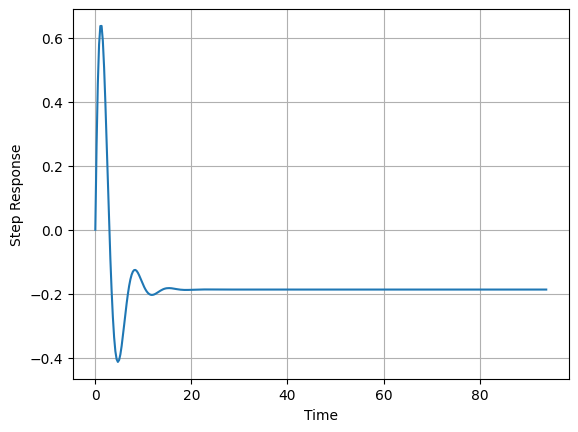

TransferFunction(array([ 1.15101   , -0.17327525]), array([1.     , 0.736  , 0.92586, 0.     ]))

In [232]:
s=ctrl.TransferFunction.s



Theta=1.15101*s-0.17327525
Delta=0.92586*s+0.736*s**2+s**3

#G is our thranfer function
G=Theta/Delta



t_imp,x_imp=ctrl.impulse_response(G)

#below is the codee to plot a graph

plt.grid()
plt.xlabel('Time')
plt.ylabel('Step Response')
plt.plot(t_imp,x_imp)
plt.show()
G


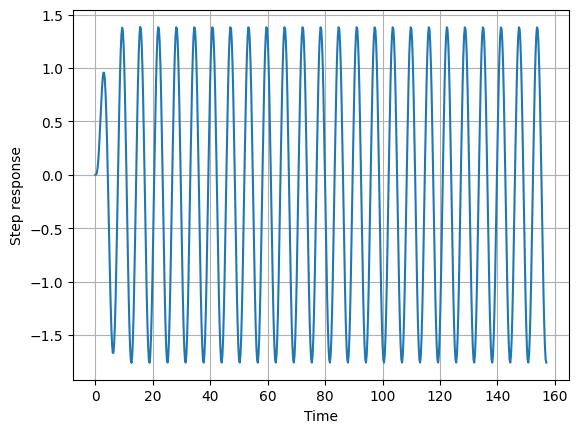

In [233]:
G2=G/(s**2+1)
t_freq,x_freq=ctrl.impulse_response(G2)

#below is the code to plot a graph

plt.grid()
plt.xlabel('Time')
plt.ylabel('Step response')
plt.plot(t_freq,x_freq)
plt.show()

TransferFunction(array([ 1.15101   , -0.17327525]), array([ 0.82648308,  0.76212157, 46.96626   , -6.93101   ]))

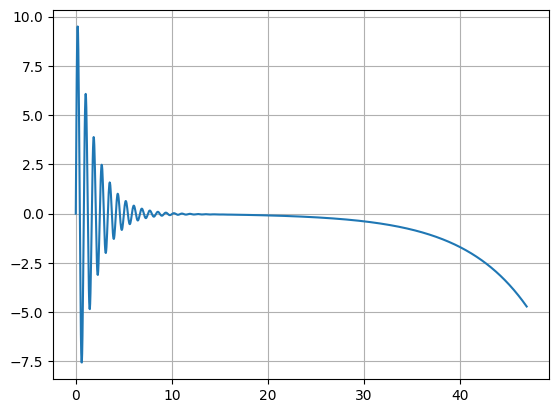

In [494]:

#Below is the values for our PD controller
kp=0.8*50
ki=0
kd=1.2/8


#This is the delay for our sytem to react
delay=np.exp(5e-3)

Gpid=kp+ki/s+kd*s*(-delay*s)



G_load = ctrl.feedback(G, Gpid, sign=-1)

t_imp, theta_imp=ctrl.impulse_response(G_load)

#below is the code to plot a graph
plt.plot(t_imp, np.rad2deg(theta_imp))

plt.grid(True)

plt.show


G_load

TransferFunction(array([ 1.15101   , -0.17327525,  0.        ]), array([ 8.84322054e-01,  7.53414380e-01,  5.75505000e+12, -8.66376250e+11,
       -1.73275250e-02]))

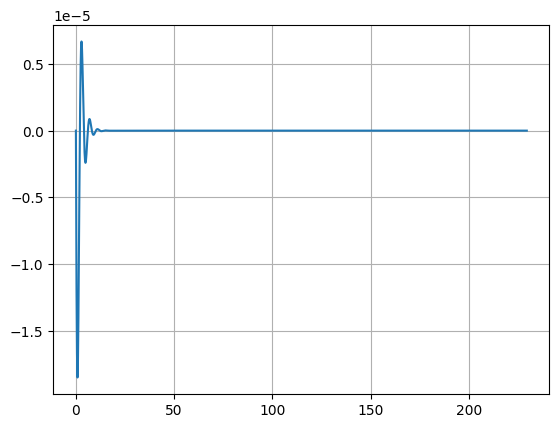

In [500]:
#Below is the values for our PID controller

kp=5000000000000
ki=0.1
kd=0.1


#This is the delay for our sytem to react

delay=np.exp(5e-3)

Gpid=kp+ki/s+kd*s*(-delay*s)



G_load = ctrl.feedback(G, Gpid, sign=-1)
G_load

t_imp, theta_imp=ctrl.impulse_response(G_load)

#below is the code to plot a graph

plt.plot(t_imp, np.rad2deg(theta_imp))

plt.grid(True)

plt.show


G_load